In [1]:
#交差検証
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
import seaborn as sns

In [2]:
video_tsv_merge_data = pd.read_table('./Output/pivot_merge/video_tsv_merge_data.tsv',sep="\t", index_col=None)

In [3]:
video_tsv_merge_data

,video_id,watch_num,comment_num,mylist_num,title,category,upload_time,file_type,length,size_high,size_low
0,sm8896,38882,1292,435,(MAD) [東方] うどんげとてゐ,NaN,1173211747,flv,241,5215313,3737091
1,sm5800,429015,2464,2757,ロベルト・カルロスのフリーキック,スポーツ,1173174475,flv,65,3289769,3242845
2,sm8917,3953,63,13,THE IDOLM@STER アイドルマスター 魔法をかけて by 亜美＠とかち,NaN,1173212678,flv,129,5342052,5294972
3,sm4786,7636,164,19,beatmania RE-ROOTS(A),NaN,1173164796,flv,117,5666433,5580696
4,sm5017,1274,13,0,ビットジェネーレーション デジドライブ,NaN,1173166855,flv,358,12203974,9092032
5,sm1552,10007,349,27,IDOLM@STER アイドルマスター 美希 ショート コミュ ABランク TVリハーサル,NaN,1173138306,flv,172,7882160,7642193
6,sm2467,9521,418,50,[peercast] 佐々木と愉快な仲間たち もう恋なんてしない,NaN,1173146610,flv,271,7469965,7371343
7,sm7747,31762,92,12,斬鉄・・・,NaN,1173193550,flv,14,744634,746153
8,sm7864,362704,7167,5678,大神ＭＡＤ,NaN,1173194895,flv,211,9970129,9593707
9,sm4375,141676,1678,2463,【ＭＡＤ】 アーマードコア ACPV forever 『原罪のレクイエム』,ゲーム,1173160974,flv,240,11419358,11221804


In [4]:
# UNIX時間を変換
video_tsv_merge_data['upload_time'] =  pd.to_datetime(video_tsv_merge_data['upload_time'], unit='s')
video_tsv_merge_data['year'] = video_tsv_merge_data['upload_time'].dt.year
video_tsv_merge_data['month'] = video_tsv_merge_data['upload_time'].dt.month
video_tsv_merge_data['day'] = video_tsv_merge_data['upload_time'].dt.day
video_tsv_merge_data['hour'] = video_tsv_merge_data['upload_time'].dt.hour
video_tsv_merge_data['weekday_name'] = video_tsv_merge_data['upload_time'].dt.weekday_name
video_tsv_merge_data

,video_id,watch_num,comment_num,mylist_num,title,category,upload_time,file_type,length,size_high,size_low,year,month,day,hour,weekday_name
0,sm8896,38882,1292,435,(MAD) [東方] うどんげとてゐ,NaN,2007-03-06 20:09:07,flv,241,5215313,3737091,2007,3,6,20,Tuesday
1,sm5800,429015,2464,2757,ロベルト・カルロスのフリーキック,スポーツ,2007-03-06 09:47:55,flv,65,3289769,3242845,2007,3,6,9,Tuesday
2,sm8917,3953,63,13,THE IDOLM@STER アイドルマスター 魔法をかけて by 亜美＠とかち,NaN,2007-03-06 20:24:38,flv,129,5342052,5294972,2007,3,6,20,Tuesday
3,sm4786,7636,164,19,beatmania RE-ROOTS(A),NaN,2007-03-06 07:06:36,flv,117,5666433,5580696,2007,3,6,7,Tuesday
4,sm5017,1274,13,0,ビットジェネーレーション デジドライブ,NaN,2007-03-06 07:40:55,flv,358,12203974,9092032,2007,3,6,7,Tuesday
5,sm1552,10007,349,27,IDOLM@STER アイドルマスター 美希 ショート コミュ ABランク TVリハーサル,NaN,2007-03-05 23:45:06,flv,172,7882160,7642193,2007,3,5,23,Monday
6,sm2467,9521,418,50,[peercast] 佐々木と愉快な仲間たち もう恋なんてしない,NaN,2007-03-06 02:03:30,flv,271,7469965,7371343,2007,3,6,2,Tuesday
7,sm7747,31762,92,12,斬鉄・・・,NaN,2007-03-06 15:05:50,flv,14,744634,746153,2007,3,6,15,Tuesday
8,sm7864,362704,7167,5678,大神ＭＡＤ,NaN,2007-03-06 15:28:15,flv,211,9970129,9593707,2007,3,6,15,Tuesday
9,sm4375,141676,1678,2463,【ＭＡＤ】 アーマードコア ACPV forever 『原罪のレクイエム』,ゲーム,2007-03-06 06:02:54,flv,240,11419358,11221804,2007,3,6,6,Tuesday


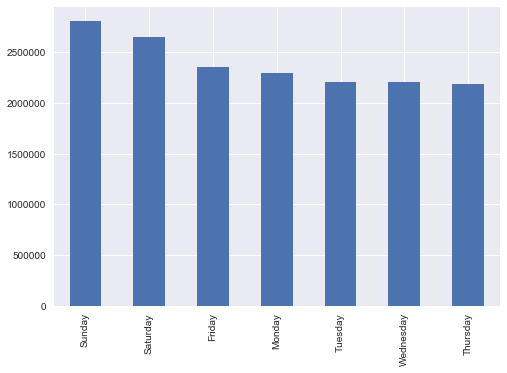

In [5]:
#各曜日の割合
video_tsv_merge_data['upload_time'].dt.weekday_name.value_counts().plot(kind='bar', position=0.5)

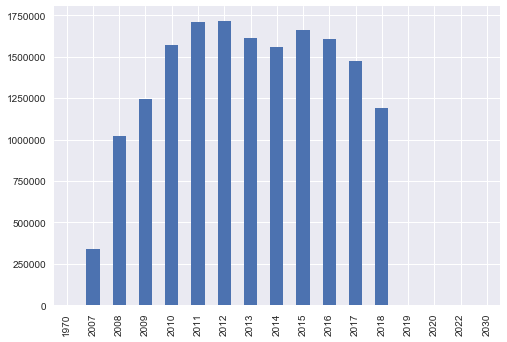

In [6]:
#年度別のデータ割合
video_tsv_merge_data['upload_time'].dt.year.value_counts().sort_index().plot(kind='bar', position=0.5)

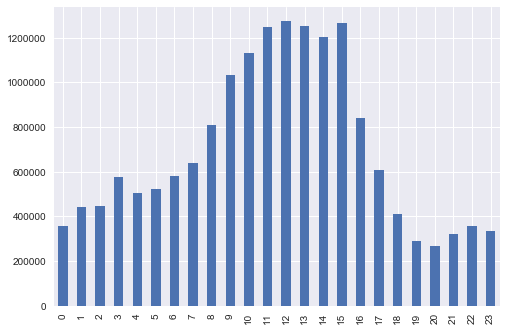

In [7]:
#時間帯別のデータ割合
video_tsv_merge_data['upload_time'].dt.hour.value_counts().sort_index().plot(kind='bar', position=0.5)

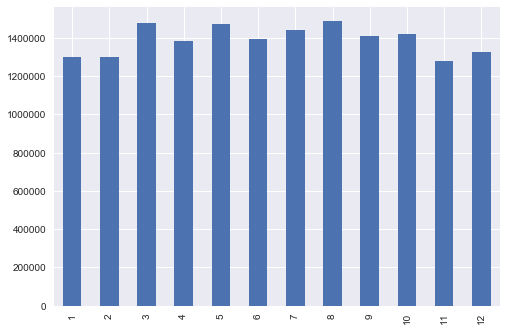

In [8]:
#月別のデータ割合
video_tsv_merge_data['upload_time'].dt.month.value_counts().sort_index().plot(kind='bar', position=0.5)

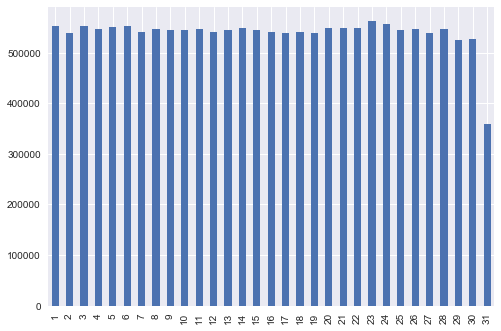

In [9]:
#日別のデータ割合
video_tsv_merge_data['upload_time'].dt.day.value_counts().sort_index().plot(kind='bar', position=0.5)